In [2]:
using BeamLib: IsotropicArray, steerphi, capon
using LinearAlgebra

fc = 150e6

# Spacing:  1m is λ/2 for 150MHz 
# Oriented along yaxis to match Matlab behavior
pa = IsotropicArray([0 0 0 0;
                    -1.5 -0.5 0.5 1.5])

# test signal generation
Θ = deg2rad.([10, 80])
d = length(Θ)
fs = 8e3
t = transpose(0:1/fs:1)
s1 = sin.(2π*t*300)
s2 = cos.(2π*t*400)

s = steerphi(pa, fc, Θ[1]).*s1 + steerphi(pa, fc, Θ[2]).*s2
n = (0.1/sqrt(2))*(randn(size(s)) + 1im*randn(size(s)))
X = s + n

# Capon spectrum 
# Same as steering capon_weights / mpdr_weights 
# but using the capon function is more convenient for
# DoA estimation
ϕaxis = LinRange(-90, 90, 360)
P_M = capon.(Ref(pa), Ref(X), Ref(fc), deg2rad.(ϕaxis))

360-element Vector{ComplexF64}:
  0.3404230388271415 + 1.668994709714376e-15im
  0.3398407747246431 + 8.903825774661991e-17im
 0.33809684459927236 + 1.9111982961839543e-15im
  0.3352001600746285 + 1.3259851573890907e-15im
 0.33116661483627546 + 1.994495084011153e-15im
 0.32602050009299177 + 1.429848629507681e-15im
  0.3197962058416105 + 1.483586935552531e-15im
 0.31253995575855376 + 1.7661234832275149e-15im
 0.30431129355615555 + 9.710971986044807e-16im
 0.29518404104120194 + 8.487981712605767e-16im
                     ⋮
 0.35679574108324846 + 2.0461131715561128e-15im
  0.3479436392220867 + 1.7717692188549228e-15im
 0.34033930667727563 + 1.5078029472995996e-15im
 0.33396413102054406 + 1.471441340323615e-15im
  0.3287938223786194 + 9.64581885369941e-16im
  0.3248034046303079 + 1.2981898008157101e-15im
  0.3219706273311394 + 1.3985455233506278e-15im
 0.32027822415015145 + 2.2223375697719764e-15im
 0.31971532468731045 + 5.864657496725305e-16im

In [3]:
# Find DoAs
import Peaks
ϕaxis[Peaks.findmaxima(abs.(P_M)).indices]

2-element Vector{Float64}:
  9.777158774373248
 79.97214484679665

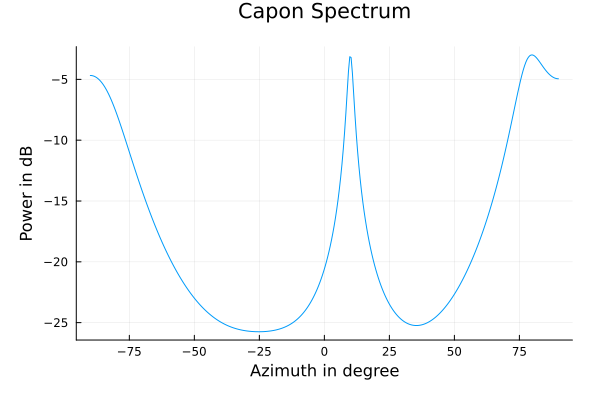

In [5]:
using Plots
import Measures
p1 = plot(ϕaxis, 10*log10.(abs.(P_M)))
plot!(title="Capon Spectrum", legend = false, margin=5*Measures.mm)
xlabel!("Azimuth in degree")
ylabel!("Power in dB")